# Building a Neural Network

### Overview
#### In this notebook, I will build a neural network to predict the type of crop given some parameters. Such as `NPK` values, `pH` value, `temperature` and `humidity`.

### Viewing the Data

In [6]:
import pandas as pd

dfEst = pd.read_csv('./datasets/CropData.csv')
#drop the first column
dfEst = dfEst.drop(dfEst.columns[0], axis=1)
print(dfEst.shape)
dfEst.head()

(1843, 5)


,Crop,N,P,K,pH
0,Rice,80,40,40,5.5
1,Jowar(Sorghum),80,40,40,5.5
2,Barley(JAV),70,40,45,5.5
3,Maize,80,40,20,5.5
4,Ragi( naachnnii),50,40,20,5.5


In [7]:
dfSensor = pd.read_csv('./datasets/SensorValues.csv')
print(dfSensor.shape)
dfSensor.head()

(2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K 
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks

# using all NPK values predict temperature

#  i have {N,P,K,temperature,humidity,ph,rainfall,label} in dfSensor

# Create a model that can predict temperature from NPK values and pH

def create_model():
    model = Sequential()
    model.add(Dense(4, input_dim=4, activation='relu'))        
    model.add(Dense(512, activation='relu'))     
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4, activation='linear'))    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

# Using all NPK and pH values predict temperature


x = dfSensor[['N','P','K','ph']]
y = dfSensor['temperature']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the model
model = create_model()

Epoch 1/300
55/55 [==============================] - 1s 4ms/step - loss: 223.2204 - mean_squared_error: 223.2204 - val_loss: 143.0787 - val_mean_squared_error: 143.0787
Epoch 2/300
55/55 [==============================] - 0s 3ms/step - loss: 148.3927 - mean_squared_error: 148.3927 - val_loss: 121.0962 - val_mean_squared_error: 121.0962
Epoch 3/300
55/55 [==============================] - 0s 2ms/step - loss: 127.4849 - mean_squared_error: 127.4849 - val_loss: 118.8431 - val_mean_squared_error: 118.8431
Epoch 4/300
55/55 [==============================] - 0s 2ms/step - loss: 117.7371 - mean_squared_error: 117.7371 - val_loss: 93.2501 - val_mean_squared_error: 93.2501
Epoch 5/300
55/55 [==============================] - 0s 2ms/step - loss: 101.2969 - mean_squared_error: 101.2969 - val_loss: 89.4893 - val_mean_squared_error: 89.4893
Epoch 6/300
55/55 [==============================] - 0s 2ms/step - loss: 88.0605 - mean_squared_error: 88.0605 - val_loss: 65.3145 - val_mean_squared_error: 65

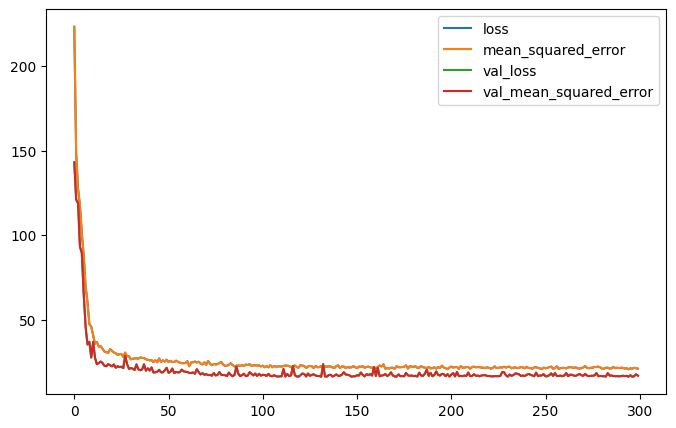

In [9]:
import matplotlib.pyplot as plt
history = model.fit(x_train, y_train, epochs=300, batch_size=32, verbose=1, validation_data=(x_test, y_test))
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [25]:
# make a prediction using NPK and pH values
#90,42,43,6.5

#prediction = model.predict([[90,42,43,6.5]])
#print(prediction)

# convert keras model to LaTex code mathematically equation
import numpy as np

def model_to_latex_equation(model):
    # get the weights and biases
    weights = model.get_weights()
    # get the number of layers
    n_layers = len(weights) // 2
    
    # get the input shape
    input_shape = model.layers[0].input_shape[1]
    # get the output shape
    output_shape = model.layers[-1].output_shape[1]

    # create the input layer
    latex_equation = r'\begingroup' + '\n'
    latex_equation += r'\allowdisplaybreaks' + '\n'
    latex_equation += r'\begin{align} ' + '\n y = '        
    # create the hidden layers
    linebuffer = ''
    for i in range(n_layers):
        # get the weights and biases
        w = weights[i*2]
        b = weights[i*2+1]
        # get the number of neurons in the layer
        n_neurons = w.shape[1]
        # create the layer
        for j in range(n_neurons):
            # create the neuron
            latex_equation += '''%0.2f''' % b[j]
            for k in range(input_shape):
                
                linebuffer += ''' + %0.2f x_{%d}''' % (w[k,j], k)
                #only allow the linebuffer to be 60 characters long       
                if len(linebuffer) > 60:
                    latex_equation += linebuffer + r'\\' + '\n'
                    linebuffer = ''
            latex_equation += linebuffer
            linebuffer = ''
            
                    
                    
                    
        # set the input shape to the number of neurons in the layer
        input_shape = n_neurons
    # create the output layer
    latex_equation += '''\\end{align}%\n'''
    latex_equation += '''\\endgroup'''
    
    return latex_equation

# save the equation to a file
with open('equation.txt', 'w') as f:
    f.write(model_to_latex_equation(model))